In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import smogn
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [2]:
# Load data
cytof_freq = pd.read_csv("../../data/TMA36_project/CyTOF/processed/Data_paper2/both/cytof_freq.csv", index_col=0)
cytof_medianprot = pd.read_csv("../../data/TMA36_project/CyTOF/processed/Data_paper2/both/cytof_medianprot.csv", index_col=0)
rna_pathways = pd.read_csv("../../data/TMA36_project/RNA_Seq/processed/pathways_scores.csv", index_col=0)
rna_pathways_hm = pd.read_csv("../../data/TMA36_project/RNA_Seq/processed/pathways_scores_HM.csv", index_col=0)
rna_pathways_rtm = pd.read_csv("../../data/TMA36_project/RNA_Seq/processed/pathways_scores_RTM.csv", index_col=0)
wes_binary = pd.read_csv("../../data/TMA36_project/WES/processed/wes_binary.csv", index_col=0)
rad_hm = pd.read_csv("../../data/TMA36_project/Radiomics/processed/rad_healthmyne.csv", index_col=0)
cde = pd.read_csv("../../data/TMA36_project/CDE/CDE_TMA36_2020FEB25_SA_MF.csv", index_col=1)

In [3]:
cytof_medianprot.drop('CD90', axis=1, inplace=True)

In [4]:
cde_sila = pd.DataFrame(cde['SILA'])

In [11]:
def pw_corr(data, cde):
    cde_sila = pd.DataFrame(cde['SILA'])
    data_sila = pd.merge(data, cde_sila, how='left', left_index=True, right_index=True)
    pairwise = data_sila.pairwise_corr(method='spearman',padjust='holm', columns=['SILA'])
    pairwise_sig = pairwise[pairwise['p-corr']<0.05]

    return pairwise_sig

In [12]:
pw_corr(rad_hm, cde)

X                                       Y    method alternative   n  \
6    SILA                       ANTPOST_LENGTH_MM  spearman   two-sided  91   
19   SILA         AUTO_LARGEST_PLANAR_DIAMETER_MM  spearman   two-sided  91   
32   SILA   AUTO_LARGEST_PLANAR_ORTHO_DIAMETER_MM  spearman   two-sided  91   
45   SILA               AUTO_CORONAL_LONG_AXIS_MM  spearman   two-sided  91   
58   SILA              AUTO_CORONAL_SHORT_AXIS_MM  spearman   two-sided  91   
71   SILA              AUTO_SAGITTAL_LONG_AXIS_MM  spearman   two-sided  91   
84   SILA             AUTO_SAGITTAL_SHORT_AXIS_MM  spearman   two-sided  91   
85   SILA                   AVG_AXIAL_DIAMETER_MM  spearman   two-sided  91   
86   SILA                 AVG_CORONAL_DIAMETER_MM  spearman   two-sided  91   
88   SILA             AVG_DENSITY_OF_SOLID_REGION  spearman   two-sided  91   
89   SILA                AVG_SAGITTAL_DIAMETER_MM  spearman   two-sided  91   
102  SILA              LARGEST_PLANAR_DIAMETER_MM  spearman   two-sided  91   
115  SILA        LARGEST_PLANAR_ORTHO_DIAMETER_MM  spearman   two-sided  91   
119  SILA                         COMPACTNESS1_MM  spearman   two-sided  91   
133  SILA                    CORONAL_LONG_AXIS_MM  spearman   two-sided  91   
146  SILA                   CORONAL_SHORT_AXIS_MM  spearman   two-sided  91   
153  SILA                 CRANIALCAUDAL_LENGTH_MM  spearman   two-sided  91   
155  SILA                           ENERGY_VOXELS  spearman   two-sided  91   
171  SILA                          FOOTPRINT_Y_MM  spearman   two-sided  91   
174  SILA                           GLCM_COL_MEAN  spearman   two-sided  91   
181  SILA                            GLCM_ENTROPY  spearman   two-sided  91   
182  SILA                        GLCM_HOMOGENEITY  spearman   two-sided  91   
183  SILA                           GLCM_ROW_MEAN  spearman   two-sided  91   
186  SILA                             KURTOSIS_HU  spearman   two-sided  91   
187  SILA                         KURTOSIS_VOXELS  spearman   two-sided  91   
188  SILA                          L1_DISTANCE_MM  spearman   two-sided  91   
192  SILA                          L2_DISTANCE_MM  spearman   two-sided  91   
196  SILA                          L3_DISTANCE_MM  spearman   two-sided  91   
200  SILA                  PART_SOLID_DIAMETER_MM  spearman   two-sided  91   
201  SILA                             LESION_TYPE  spearman   two-sided  91   
202  SILA                   LUNG_RADS_DIAMETER_MM  spearman   two-sided  91   
203  SILA                     LUNG_RADS_ISOLATION  spearman   two-sided  91   
204  SILA                               LUNG_RADS  spearman   two-sided  91   
205  SILA                                  MAX_HU  spearman   two-sided  91   
206  SILA                              MAX_VOXELS  spearman   two-sided  91   
207  SILA                                 MEAN_HU  spearman   two-sided  91   
210  SILA                             MEAN_VOXELS  spearman   two-sided  91   
211  SILA                               MEDIAN_HU  spearman   two-sided  91   
212  SILA                           MEDIAN_VOXELS  spearman   two-sided  91   
215  SILA  NORMALIZED_ABOVE_MEAN_DEVIATION_VOXELS  spearman   two-sided  91   
217  SILA                             PERCENT_GGO  spearman   two-sided  91   
218  SILA                           PERCENT_SOLID  spearman   two-sided  91   
219  SILA                  PERCENT_SOLID_INCL_AIR  spearman   two-sided  91   
220  SILA                        ROOT_MEAN_SQUARE  spearman   two-sided  91   
221  SILA                 ROOT_MEAN_SQUARE_VOXELS  spearman   two-sided  91   
234  SILA                   SAGITTAL_LONG_AXIS_MM  spearman   two-sided  91   
247  SILA                  SAGITTAL_SHORT_AXIS_MM  spearman   two-sided  91   
248  SILA                             SKEWNESS_HU  spearman   two-sided  91   
249  SILA                         SKEWNESS_VOXELS  spearman   two-sided  91   
251  SILA                         SOLID_VOLUME_ML  spearma

In [7]:
rad_hm_sila = pd.merge(rad_hm, cde_sila, how='left', left_index=True, right_index=True)
pairwise = rad_hm_sila.pairwise_corr(method='spearman',padjust='holm', columns=['SILA'])
pairwise_sig = pairwise[pairwise['p-corr']<0.05]
hm_sigvars = pairwise_sig['Y']

In [26]:
print(pd.__version__)

1.3.3


In [22]:
scipy.stats.spearmanr(rad_hm_sila['SILA'], rad_hm_sila['AVG_DENSITY_OF_SOLID_REGION'])

SpearmanrResult(correlation=0.8883571115712141, pvalue=7.769582758590602e-32)

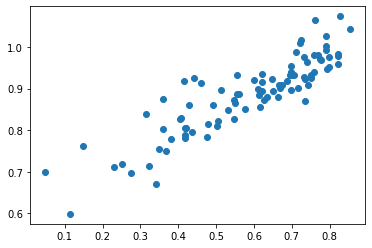

In [21]:
plt.scatter(rad_hm_sila['SILA'], rad_hm_sila['AVG_DENSITY_OF_SOLID_REGION'])

In [19]:
pd.set_option('display.max_rows', 500)
pairwise_sig

X                                       Y    method alternative   n  \
6    SILA                       ANTPOST_LENGTH_MM  spearman   two-sided  91   
19   SILA         AUTO_LARGEST_PLANAR_DIAMETER_MM  spearman   two-sided  91   
32   SILA   AUTO_LARGEST_PLANAR_ORTHO_DIAMETER_MM  spearman   two-sided  91   
45   SILA               AUTO_CORONAL_LONG_AXIS_MM  spearman   two-sided  91   
58   SILA              AUTO_CORONAL_SHORT_AXIS_MM  spearman   two-sided  91   
71   SILA              AUTO_SAGITTAL_LONG_AXIS_MM  spearman   two-sided  91   
84   SILA             AUTO_SAGITTAL_SHORT_AXIS_MM  spearman   two-sided  91   
85   SILA                   AVG_AXIAL_DIAMETER_MM  spearman   two-sided  91   
86   SILA                 AVG_CORONAL_DIAMETER_MM  spearman   two-sided  91   
88   SILA             AVG_DENSITY_OF_SOLID_REGION  spearman   two-sided  91   
89   SILA                AVG_SAGITTAL_DIAMETER_MM  spearman   two-sided  91   
102  SILA              LARGEST_PLANAR_DIAMETER_MM  spearman   two-sided  91   
115  SILA        LARGEST_PLANAR_ORTHO_DIAMETER_MM  spearman   two-sided  91   
119  SILA                         COMPACTNESS1_MM  spearman   two-sided  91   
133  SILA                    CORONAL_LONG_AXIS_MM  spearman   two-sided  91   
146  SILA                   CORONAL_SHORT_AXIS_MM  spearman   two-sided  91   
153  SILA                 CRANIALCAUDAL_LENGTH_MM  spearman   two-sided  91   
155  SILA                           ENERGY_VOXELS  spearman   two-sided  91   
171  SILA                          FOOTPRINT_Y_MM  spearman   two-sided  91   
174  SILA                           GLCM_COL_MEAN  spearman   two-sided  91   
181  SILA                            GLCM_ENTROPY  spearman   two-sided  91   
182  SILA                        GLCM_HOMOGENEITY  spearman   two-sided  91   
183  SILA                           GLCM_ROW_MEAN  spearman   two-sided  91   
186  SILA                             KURTOSIS_HU  spearman   two-sided  91   
187  SILA                         KURTOSIS_VOXELS  spearman   two-sided  91   
188  SILA                          L1_DISTANCE_MM  spearman   two-sided  91   
192  SILA                          L2_DISTANCE_MM  spearman   two-sided  91   
196  SILA                          L3_DISTANCE_MM  spearman   two-sided  91   
200  SILA                  PART_SOLID_DIAMETER_MM  spearman   two-sided  91   
201  SILA                             LESION_TYPE  spearman   two-sided  91   
202  SILA                   LUNG_RADS_DIAMETER_MM  spearman   two-sided  91   
203  SILA                     LUNG_RADS_ISOLATION  spearman   two-sided  91   
204  SILA                               LUNG_RADS  spearman   two-sided  91   
205  SILA                                  MAX_HU  spearman   two-sided  91   
206  SILA                              MAX_VOXELS  spearman   two-sided  91   
207  SILA                                 MEAN_HU  spearman   two-sided  91   
210  SILA                             MEAN_VOXELS  spearman   two-sided  91   
211  SILA                               MEDIAN_HU  spearman   two-sided  91   
212  SILA                           MEDIAN_VOXELS  spearman   two-sided  91   
215  SILA  NORMALIZED_ABOVE_MEAN_DEVIATION_VOXELS  spearman   two-sided  91   
217  SILA                             PERCENT_GGO  spearman   two-sided  91   
218  SILA                           PERCENT_SOLID  spearman   two-sided  91   
219  SILA                  PERCENT_SOLID_INCL_AIR  spearman   two-sided  91   
220  SILA                        ROOT_MEAN_SQUARE  spearman   two-sided  91   
221  SILA                 ROOT_MEAN_SQUARE_VOXELS  spearman   two-sided  91   
234  SILA                   SAGITTAL_LONG_AXIS_MM  spearman   two-sided  91   
247  SILA                  SAGITTAL_SHORT_AXIS_MM  spearman   two-sided  91   
248  SILA                             SKEWNESS_HU  spearman   two-sided  91   
249  SILA                         SKEWNESS_VOXELS  spearman   two-sided  91   
251  SILA                         SOLID_VOLUME_ML  spearma

In [131]:
pd.set_option('display.max_rows', 500)
pairwise_sig

X                                       Y    method       tail   n  \
6    SILA                       ANTPOST_LENGTH_MM  spearman  two-sided  91   
19   SILA         AUTO_LARGEST_PLANAR_DIAMETER_MM  spearman  two-sided  91   
32   SILA   AUTO_LARGEST_PLANAR_ORTHO_DIAMETER_MM  spearman  two-sided  91   
45   SILA               AUTO_CORONAL_LONG_AXIS_MM  spearman  two-sided  91   
58   SILA              AUTO_CORONAL_SHORT_AXIS_MM  spearman  two-sided  91   
71   SILA              AUTO_SAGITTAL_LONG_AXIS_MM  spearman  two-sided  91   
84   SILA             AUTO_SAGITTAL_SHORT_AXIS_MM  spearman  two-sided  91   
85   SILA                   AVG_AXIAL_DIAMETER_MM  spearman  two-sided  91   
86   SILA                 AVG_CORONAL_DIAMETER_MM  spearman  two-sided  91   
88   SILA             AVG_DENSITY_OF_SOLID_REGION  spearman  two-sided  91   
89   SILA                AVG_SAGITTAL_DIAMETER_MM  spearman  two-sided  91   
102  SILA              LARGEST_PLANAR_DIAMETER_MM  spearman  two-sided  91   
115  SILA        LARGEST_PLANAR_ORTHO_DIAMETER_MM  spearman  two-sided  91   
119  SILA                         COMPACTNESS1_MM  spearman  two-sided  91   
133  SILA                    CORONAL_LONG_AXIS_MM  spearman  two-sided  91   
146  SILA                   CORONAL_SHORT_AXIS_MM  spearman  two-sided  91   
153  SILA                 CRANIALCAUDAL_LENGTH_MM  spearman  two-sided  91   
155  SILA                           ENERGY_VOXELS  spearman  two-sided  91   
171  SILA                          FOOTPRINT_Y_MM  spearman  two-sided  91   
174  SILA                           GLCM_COL_MEAN  spearman  two-sided  91   
181  SILA                            GLCM_ENTROPY  spearman  two-sided  91   
182  SILA                        GLCM_HOMOGENEITY  spearman  two-sided  91   
183  SILA                           GLCM_ROW_MEAN  spearman  two-sided  91   
186  SILA                             KURTOSIS_HU  spearman  two-sided  91   
187  SILA                         KURTOSIS_VOXELS  spearman  two-sided  91   
188  SILA                          L1_DISTANCE_MM  spearman  two-sided  91   
192  SILA                          L2_DISTANCE_MM  spearman  two-sided  91   
196  SILA                          L3_DISTANCE_MM  spearman  two-sided  91   
200  SILA                  PART_SOLID_DIAMETER_MM  spearman  two-sided  91   
201  SILA                             LESION_TYPE  spearman  two-sided  91   
202  SILA                   LUNG_RADS_DIAMETER_MM  spearman  two-sided  91   
203  SILA                     LUNG_RADS_ISOLATION  spearman  two-sided  91   
204  SILA                               LUNG_RADS  spearman  two-sided  91   
205  SILA                                  MAX_HU  spearman  two-sided  91   
206  SILA                              MAX_VOXELS  spearman  two-sided  91   
207  SILA                                 MEAN_HU  spearman  two-sided  91   
210  SILA                             MEAN_VOXELS  spearman  two-sided  91   
211  SILA                               MEDIAN_HU  spearman  two-sided  91   
212  SILA                           MEDIAN_VOXELS  spearman  two-sided  91   
215  SILA  NORMALIZED_ABOVE_MEAN_DEVIATION_VOXELS  spearman  two-sided  91   
217  SILA                             PERCENT_GGO  spearman  two-sided  91   
218  SILA                           PERCENT_SOLID  spearman  two-sided  91   
219  SILA                  PERCENT_SOLID_INCL_AIR  spearman  two-sided  91   
220  SILA                        ROOT_MEAN_SQUARE  spearman  two-sided  91   
221  SILA                 ROOT_MEAN_SQUARE_VOXELS  spearman  two-sided  91   
234  SILA                   SAGITTAL_LONG_AXIS_MM  spearman  two-sided  91   
247  SILA                  SAGITTAL_SHORT_AXIS_MM  spearman  two-sided  91   
248  SILA                             SKEWNESS_HU  spearman  two-sided  91   
249  SILA                         SKEWNESS_VOXELS  spearman  two-sided  91   
251  SILA                         SOLID_VOLUME_ML  spearman  two-sided  91   
252  SILA                     

In [105]:
# CyTOF significant vars
cytof_freq_sigvars = pd.Series(['ECC_3', 'ECC_5', 'fmes_3', 'OtherI_4'])
cytof_medianprot_sigvars = pd.Series(['HLA-DR'])

In [108]:
cytof1 = cytof_freq[cytof_freq_sigvars]
cytof2 = cytof_medianprot[cytof_medianprot_sigvars]
rad_hm_1 = rad_hm[hm_sigvars]

In [109]:
all_vars = pd.merge(cytof1, cytof2, how='inner', left_index=True, right_index=True)
all_vars = pd.merge(all_vars, rad_hm_1, how='inner', left_index=True, right_index=True)
all_vars = pd.merge(all_vars, rna_pathways, how='inner', left_index=True, right_index=True)

In [115]:
all_vars

ECC_3     ECC_5    fmes_3  OtherI_4    HLA-DR  ANTPOST_LENGTH_MM  \
11938  0.101126  0.029805  0.053467  0.071417  4.099674          13.942079   
13376  0.006129  0.116247  0.009945  0.009434  0.387306          37.086704   
13436  0.080077  0.111410  0.000490  0.007130  0.383796          48.070004   
8356   0.063847  0.004417  0.035738  0.360728  5.983582          18.860355   
12994  0.000422  0.036160  0.000701  0.001152  0.346948          30.477747   
12929  0.016378  0.007424  0.070349  0.083025  2.289711          35.657420   
12924  0.495267  0.011223  0.004930  0.022067  4.319625          16.551860   
13622  0.011611  0.013059  0.012012  0.007959  0.801956          28.303587   
13771  0.399244  0.002871  0.009287  0.030767  4.275562          20.717773   
13651  0.362307  0.018272  0.046724  0.038980  4.595982          16.126757   
13074  0.000405  0.005642  0.000648  0.000373  0.310594          13.955081   
11817  0.046026  0.109580  0.023682  0.043484  2.628675          37.352837   
13536  0.068332  0.014871  0.078237  0.040831  3.078148          14.046661   
11906  0.132896  0.018674  0.084700  0.038972  3.157840          14.245823   
13276  0.000107  0.038796  0.000954  0.001055  0.087151          19.465809   
13207  0.000526  0.017514  0.000307  0.003135  0.231658          23.529034   
13317  0.025828  0.011996  0.001684  0.009735  0.485678          18.954681   
12915  0.323846  0.002169  0.015489  0.018960  4.691370          32.220406   
13769  0.311871  0.007921  0.061746  0.034160  4.745394          24.225595   
11855  0.065287  0.003988  0.014697  0.014477  3.046141          21.586040   
11851  0.032669  0.018852  0.065446  0.050450  2.619233          28.445970   
11538  0.012702  0.020983  0.114568  0.040561  3.964126          21.979280   
12889  0.046132  0.087357  0.021973  0.050181  2.421256          51.666172   
12931  0.032574  0.145978  0.021658  0.050763  2.574069          48.509842   
11813  0.274370  0.006246  0.026099  0.064689  5.062489          17.182894   
11646  0.020601  0.002296  0.125615  0.068388  3.539414          25.639484   
11759  0.049326  0.001506  0.029864  0.072579  1.957332          17.766863   
13014  0.019337  0.009612  0.009574  0.003430  0.163675          47.788876   
14855  0.039059  0.020017  0.016121  0.068979  1.676129          36.189670   
11952  0.316152  0.010665  0.009269  0.091976  4.343667          24.076902   
11561  0.231717  0.003466  0.025121  0.048389  3.889630          21.573017   
11886  0.180011  0.004569  0.247858  0.066819  5.144356           8.734627   
13724  0.005642  0.022366  0.034455  0.041709  1.560034          51.354053   
14958  0.020814  0.006631  0.305950  0.072880  4.180762          38.030956   
12281  0.121398  0.010758  0.009918  0.021316  4.813081          18.414616   
12323  0.021388  0.012515  0.007265  0.015954  2.283783          18.991997   
14955  0.009555  0.001742  0.006144  0.011793  2.391594          16.174450   
15001  0.037308  0.007861  0.012661  0.021070  1.929448          22.346228   
14048  0.038941  0.022152  0.018990  0.018106  2.102750          30.554617   
15224  0.004194  0.002492  0.016537  0.021601  1.726412          13.841267   
14965  0.011888  0.006984  0.021510  0.028227  1.865008          24.654135   
15325  0.005931  0.007997  0.013451  0.012551  0.681723          10.874659   
14962  0.020277  0.024567  0.019937  0.024012  3.606328          32.533016   
15187  0.028481  0.000621  0.006980  0.011915  2.185801          24.633034   
15506  0.004105  0.000268  0.004003  0.013925  4.092873          31.221878   
14301  0.000568  0.002341  0.003524  0.004352  1.018656          39.235960   
13538  0.045475  0.055294  0.061438  0.039963  3.022309          14.092094   
15326  0.038000  0.002221  0.002105  0.008791  0.695975          18.211197   
15569  0.009376  0.012633  0.054104  0.037131  3.548880          43.437653   
14610  0.035669  0.013268  0.073125  0.017521  2.543705          34.937885   
13988  0.026249  0.001507  0.023

In [116]:
all_vars.to_csv("../../data/TMA36_project/Radiomics/processed/all_vars.csv", sep=',', index=True, header=True)

In [40]:
def enet(X, y, norm = True, max_iter = 2000, tol = 0.0001):
    # Hyperparameter tunning
    regr = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1],
                        max_iter=max_iter, cv=10, n_jobs=6, random_state=0,
                       normalize = norm, tol = tol)
    regr.fit(X, y)
    
    # Model training
    model = ElasticNet(l1_ratio=regr.l1_ratio_, alpha = regr.alpha_, 
                       max_iter=regr.n_iter_, fit_intercept=True,
                      normalize=norm, tol = tol)
    model.fit(X, y)
    
    return(model)

def plsregr(X, y, scale = True, max_iter = 2000, tol = 0.0001):
    # Finding optimal n_comp for PLS
    kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
    max_ncomp = min(X.shape[0], X.shape[1])
    mse = []
    for i in np.arange(1, max_ncomp+1):
        pls = PLSRegression(n_components=i, scale = scale, max_iter = max_iter, tol = tol)
        score = cross_val_score(pls, X, y, cv=kf_10, scoring='neg_mean_squared_error').mean()
        mse.append(-score)
    ncomp = mse.index(min(mse))+1
    
    # Model training
    model = PLSRegression(n_components=ncomp, scale = scale, max_iter = max_iter, tol = tol)
    model.fit(X, y)
    
    return(model)

def rfregr(X, y):
    # Create base model
    rf = RandomForestRegressor(random_state = 0)

    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [int(x) for x in np.linspace(2, 50, num = 5)],
        'n_estimators': [int(x) for x in np.linspace(10, 100, num = 10)]
    }

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 10, n_jobs = -1, verbose = 2)

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Model training
    model = RandomForestRegressor(random_state = 0, 
                              max_depth=grid_search.best_params_['max_depth'],
                              n_estimators=grid_search.best_params_['n_estimators'])
    model.fit(X,y)
    
    return(model)

def xgbregr(X, y):
    # Create base model
    xgb = XGBRegressor(random_state = 0, nthread = -1)

    # Create the parameter grid
    param_grid = {'max_depth': [2, 4, 6, 8],
                  'n_estimators': [100, 200, 300, 400],
                  'learning_rate': [.03, 0.05, .07] #so called `eta` value
                 }
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                              cv = 5, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search.fit(X, y)
    
    # Model training
    model = XGBRegressor(random_state = 0, 
                     nthread = -1,
                     max_depth=grid_search.best_params_['max_depth'],
                     n_estimators=grid_search.best_params_['n_estimators'],
                     learning_rate=grid_search.best_params_['learning_rate'])
    model.fit(X,y)
    
    return(model)


def model_training(data, cde_sila, plt_title, alg, fig_dims = (10,6), 
                   norm = True, scale = True, Sscaler = False, max_iter = 2000, 
                   tol = 0.0001, topfeat_prcnt = 0.2, smogn_ = False):
    
    # Merge with SILA score
    data = pd.merge(data, cde_sila, how = 'left', left_index=True, right_index=True)

    # Balance data
    if smogn_ == True:
        data.reset_index(inplace=True)
        data = smogn.smoter(data = data, y = 'SILA')
    
    # Separate features from response var
    X = pd.DataFrame(data.iloc[:, :-1])
    y = data['SILA']
    
    n_topfeat = round(X.shape[1]*topfeat_prcnt)
    if n_topfeat < 10:
        n_topfeat = 10
    
    # Variable standardization 
    if Sscaler == True:
        colnames = X.columns.tolist()
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X))
        X.columns = colnames
    
    # Model training
    if alg == 'ENET':
        model = enet(X, y, norm = norm, max_iter = max_iter, tol = tol)
    if alg == 'PLSR':
        model = plsregr(X, y, scale = scale, max_iter = max_iter, tol = tol)
    if alg == 'RFR':
        model = rfregr(X, y)
    if alg == 'XGBR':
        model = xgbregr(X, y)
    
    
    # Cross-validation
    y_cv = cross_val_predict(model, X, y, cv=10)
    
    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    # Print scores
    print('R2 score: ', r2)
    print('MSE: ', mse)
    print('RPD: ', rpd)
    
    # Feature importance
    if alg == 'ENET' or alg == 'PLSR':
        dt_ftimp = model.coef_
        if len(dt_ftimp.shape) == 2:
            dt_ftimp = dt_ftimp.flatten()
    else:
        dt_ftimp = model.feature_importances_
            
    feature_importance = pd.Series(index = X.columns, data = dt_ftimp)
    feature_importance = feature_importance[feature_importance!=0]
    n_selected_features = len(feature_importance)
    print('{0:d} features, reduction of {1:2.2f}%'.format(
        n_selected_features,(1-n_selected_features/len(feature_importance))*100))
    
    top_idx = feature_importance.abs().sort_values(ascending=False).head(n_topfeat).index
    feature_importance_top = feature_importance.loc[top_idx]

    if alg == 'ENET' or alg == 'PLSR':
        feature_importance_top.sort_values(inplace=True)
    
    # Plot
    clrs = ['blue' if (x<0) else 'red' for x in feature_importance_top.values]
    fig_dims = fig_dims
    fig, ax = plt.subplots(figsize=fig_dims)
    ax = sns.barplot(x=feature_importance_top.index, y=feature_importance_top.values, ax=ax, palette=clrs)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    ax.set_ylabel("Feature Importance",fontsize=15)
    ax.axes.set_title(plt_title,fontsize=20)
    ax.tick_params(labelsize=12)
    
    feature_importance = feature_importance.loc[feature_importance.abs().sort_values(ascending=False).index]
    
    return (model, feature_importance)

## CyTOF Frequencies

R2 score:  0.2714009493327689
MSE:  0.024942685302713548
RPD:  1.179874605349105
24 features, reduction of 0.00%


/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004530911710651786, tolerance: 0.00020190224375
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007306105240294514, tolerance: 0.00023068788593750005
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021365915005744363, tolerance: 0.00020583607343750004
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective di

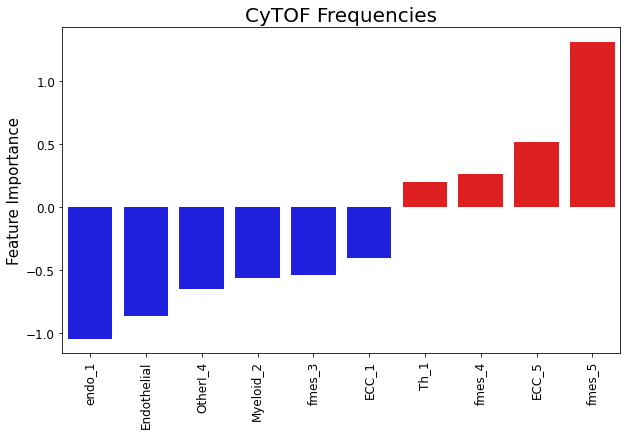

In [5]:
m1, t1 = model_training(cytof_freq, cde_sila, plt_title = 'CyTOF Frequencies', alg = 'ENET', 
               fig_dims = (10,6), max_iter = 2000, tol = 0.0001)

In [29]:
t1

fmes_5         1.313672
endo_1        -1.046410
Endothelial   -0.870139
OtherI_4      -0.654396
Myeloid_2     -0.563614
fmes_3        -0.537505
ECC_5          0.522257
ECC_1         -0.406718
fmes_4         0.261048
Th_1           0.200019
Myeloid_3      0.175801
DNT_3         -0.155895
Tc_2          -0.153411
OtherI_3       0.143180
Th_3           0.117632
ECC_6         -0.077155
OtherI_2       0.076129
Th_cells       0.063024
OtherI_1      -0.032448
ECC_2          0.031840
DNT_1          0.018893
Epithelial    -0.007870
Tc_cells      -0.003725
Tc_1          -0.001836
dtype: float64

R2 score:  0.13611814115324206
MSE:  0.029573924539436674
RPD:  1.0835600318844096
40 features, reduction of 0.00%


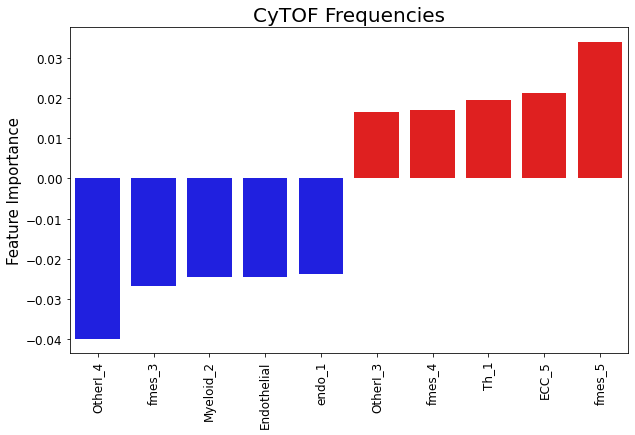

In [6]:
m2, t2 = model_training(cytof_freq, cde_sila, plt_title = 'CyTOF Frequencies', alg = 'PLSR', 
               fig_dims = (10,6), max_iter = 2000, tol = 0.0001)

In [31]:
t2

OtherI_4          -0.039796
fmes_5             0.033869
fmes_3            -0.026678
Myeloid_2         -0.024503
Endothelial       -0.024457
endo_1            -0.023867
ECC_5              0.021307
Th_1               0.019505
fmes_4             0.017026
OtherI_3           0.016500
DNT_3             -0.015750
Myeloid_3          0.014928
Th_cells           0.014648
ECC_2              0.013251
ECC_1             -0.012595
ECC_3             -0.007845
OtherI_2           0.007768
endo_3            -0.007404
OtherI_1          -0.007192
ECC_6             -0.006649
Th_3               0.005369
Other_immune      -0.004971
Fib_Mesenchymal    0.003990
Epithelial        -0.003776
Immune             0.003502
fmes_2            -0.002721
endo_2            -0.002697
DNT_cells         -0.002657
Tc_2              -0.002601
Tc_1               0.002260
Myeloid_1         -0.001466
Tc_cells           0.001366
fmes_1            -0.001124
ECC_4             -0.001101
Myeloid            0.001072
DNT_1              0

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R2 score:  0.1112047276787379
MSE:  0.030426804366197185
RPD:  1.0682657053930555
40 features, reduction of 0.00%


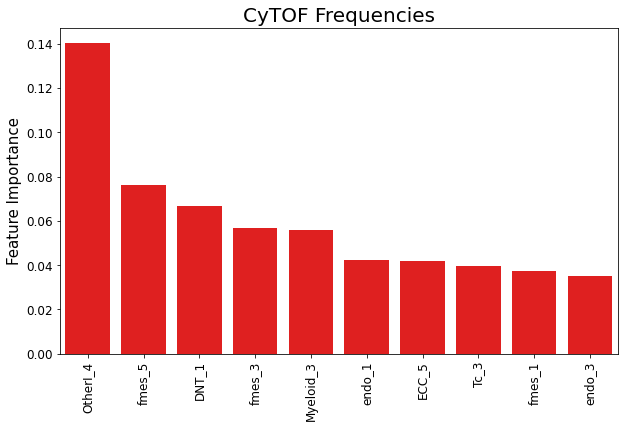

In [7]:
m3, t3 = model_training(cytof_freq, cde_sila, plt_title = 'CyTOF Frequencies', alg = 'RFR', 
               fig_dims = (10,6))

In [30]:
t3

OtherI_4           0.140194
fmes_5             0.076087
DNT_1              0.066618
fmes_3             0.056684
Myeloid_3          0.055816
endo_1             0.042498
ECC_5              0.041946
Tc_3               0.039756
fmes_1             0.037391
endo_3             0.035113
DNT_cells          0.034538
Stroma             0.032788
ECC_2              0.032667
Epithelial         0.032647
Endothelial        0.028471
ECC_1              0.024239
DNT_2              0.022172
Th_3               0.021803
ECC_3              0.021285
ECC_4              0.018860
Tc_2               0.016052
fmes_4             0.015130
Tc_1               0.012773
OtherI_3           0.011422
Myeloid_1          0.011396
Fib_Mesenchymal    0.010678
Th_1               0.010553
Other_immune       0.008999
ECC_6              0.007779
DNT_3              0.005480
OtherI_1           0.005201
Th_2               0.004863
Tc_cells           0.003647
OtherI_2           0.003425
Myeloid            0.003233
Immune             0

Fitting 5 folds for each of 48 candidates, totalling 240 fits
R2 score:  0.1460782638243071
MSE:  0.029232952086709358
RPD:  1.0898610206312789
21 features, reduction of 0.00%


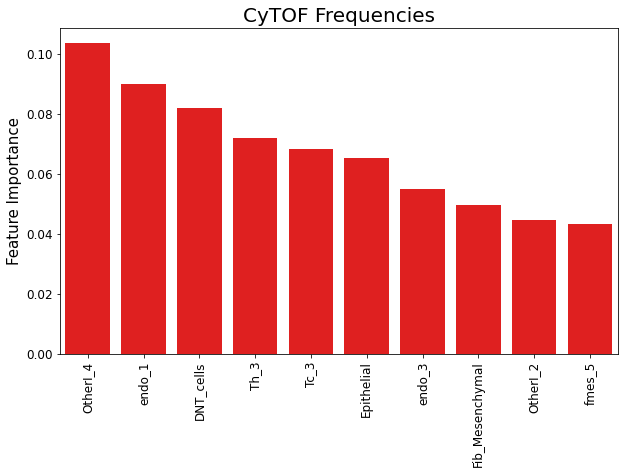

In [8]:
m4, t4 = model_training(cytof_freq, cde_sila, plt_title = 'CyTOF Frequencies', alg = 'XGBR', 
               fig_dims = (10,6))

In [32]:
t4

OtherI_4           0.103589
endo_1             0.090041
DNT_cells          0.081943
Th_3               0.071911
Tc_3               0.068542
Epithelial         0.065343
endo_3             0.055171
Fib_Mesenchymal    0.049802
OtherI_2           0.044785
fmes_5             0.043528
Myeloid            0.037908
fmes_3             0.035790
ECC_5              0.035643
Myeloid_3          0.031579
DNT_3              0.031450
Endothelial        0.030614
ECC_2              0.028043
ECC_3              0.026189
fmes_4             0.025601
ECC_4              0.021812
Myeloid_1          0.020716
dtype: float32

## CyTOF median protein expression

R2 score:  -0.003711782484840942
MSE:  0.03436082863712002
RPD:  1.0052536141729727
1 features, reduction of 0.00%


/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027066494822891585, tolerance: 0.00022896349375
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000989127247395194, tolerance: 0.0002127266
  positive)


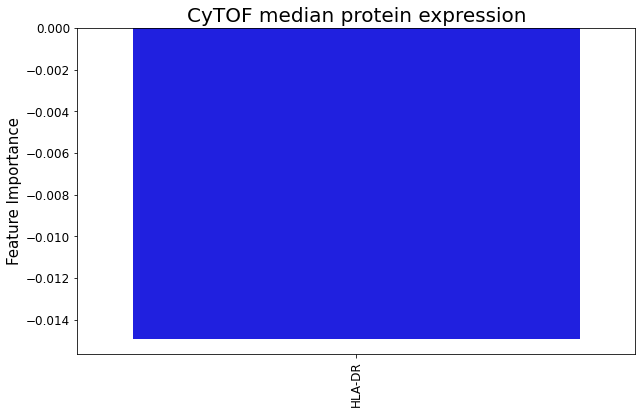

In [49]:
m5, t5 = model_training(cytof_medianprot, cde_sila, plt_title = 'CyTOF median protein expression', alg = 'ENET', 
               fig_dims = (10,6), max_iter = 2000, tol = 0.0001)

In [42]:
t5

HLA-DR   -0.014896
dtype: float64

R2 score:  -0.1730703984308244
MSE:  0.040158610911164065
RPD:  0.9298611786035405
33 features, reduction of 0.00%


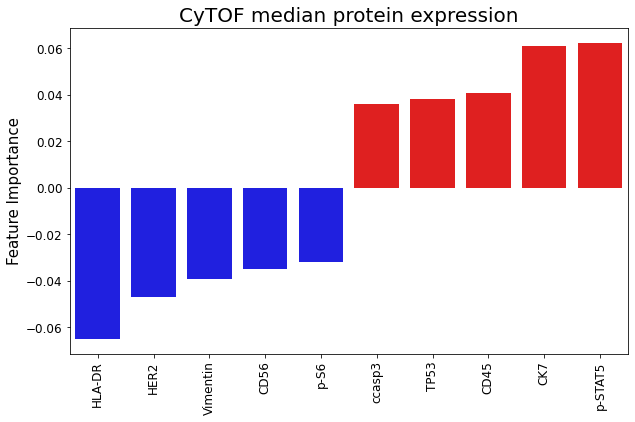

In [43]:
m6, t6 = model_training(cytof_medianprot, cde_sila, plt_title = 'CyTOF median protein expression', alg = 'PLSR', 
               fig_dims = (10,6), max_iter = 2000, tol = 0.0001)

In [44]:
t6

HLA-DR        -0.065042
p-STAT5        0.062412
CK7            0.060945
HER2          -0.046874
CD45           0.040719
Vimentin      -0.039358
TP53           0.038244
ccasp3         0.036054
CD56          -0.034989
p-S6          -0.032030
p-STAT6       -0.029968
MET           -0.026446
TP63           0.024493
CD3           -0.023961
EGFR           0.022967
Thioredoxin   -0.019778
CD4            0.017337
PD-L1          0.016894
b-CAT         -0.013851
Cytokeratin   -0.013702
p-AKT          0.013396
p-ERK          0.012794
CD11b          0.011031
CD31          -0.009560
Ki67          -0.008091
HLA-ABC       -0.008080
CD24          -0.005763
CD44           0.005055
p-STAT3        0.005025
CD8            0.004123
MDM2          -0.002056
EpCAM          0.001176
TTF1          -0.000730
dtype: float64

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R2 score:  0.0846941483682434
MSE:  0.03133436118545015
RPD:  1.0526816073460956
23 features, reduction of 0.00%


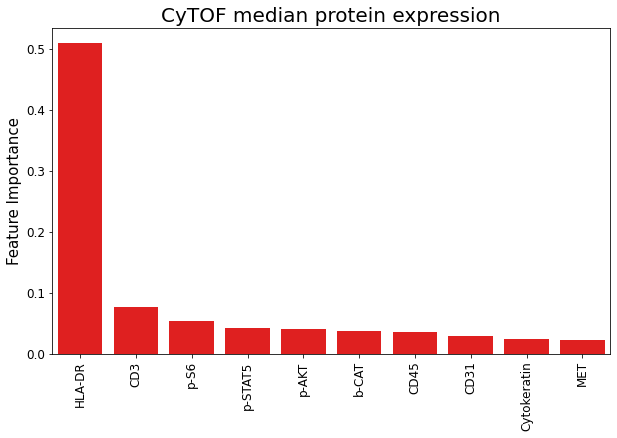

In [45]:
m7, t7 = model_training(cytof_medianprot, cde_sila, plt_title = 'CyTOF median protein expression', alg = 'RFR', 
               fig_dims = (10,6))

In [46]:
t7

HLA-DR         0.508591
CD3            0.077252
p-S6           0.054011
p-STAT5        0.043041
p-AKT          0.040874
b-CAT          0.036959
CD45           0.036786
CD31           0.029686
Cytokeratin    0.024746
MET            0.023424
CD56           0.023400
p-STAT3        0.021635
CK7            0.018160
p-ERK          0.013959
CD4            0.012309
Thioredoxin    0.011795
TP53           0.009428
Ki67           0.005534
PD-L1          0.003006
CD44           0.002214
CD11b          0.001437
HER2           0.001304
HLA-ABC        0.000448
dtype: float64

Fitting 5 folds for each of 48 candidates, totalling 240 fits
R2 score:  0.022615316660871132
MSE:  0.03345955303385994
RPD:  1.0187025420949094
21 features, reduction of 0.00%


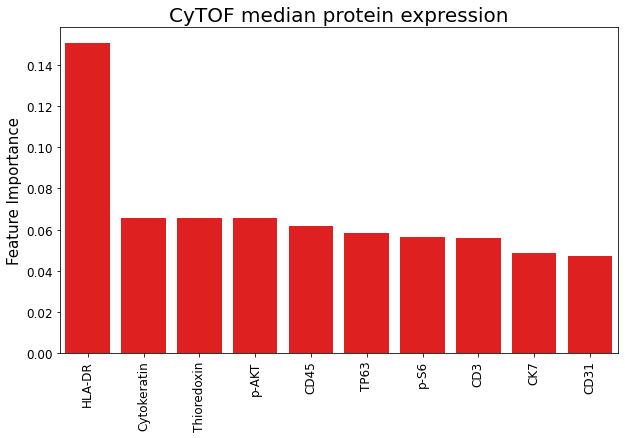

In [47]:
m8, t8 = model_training(cytof_medianprot, cde_sila, plt_title = 'CyTOF median protein expression', alg = 'XGBR', 
               fig_dims = (10,6))

In [48]:
t8

HLA-DR         0.150642
Cytokeratin    0.065837
Thioredoxin    0.065547
p-AKT          0.065474
CD45           0.061728
TP63           0.058513
p-S6           0.056455
CD3            0.056130
CK7            0.048647
CD31           0.047159
CD4            0.044175
b-CAT          0.040335
p-ERK          0.038451
CD44           0.037487
CD56           0.032774
p-STAT5        0.027298
TTF1           0.026724
p-STAT3        0.025257
TP53           0.024958
HLA-ABC        0.022743
ccasp3         0.003666
dtype: float32

## RNA-Seq pathways scores

R2 score:  0.11350210994608811
MSE:  0.02514638763820198
RPD:  1.0689640150225745
32 features, reduction of 0.00%


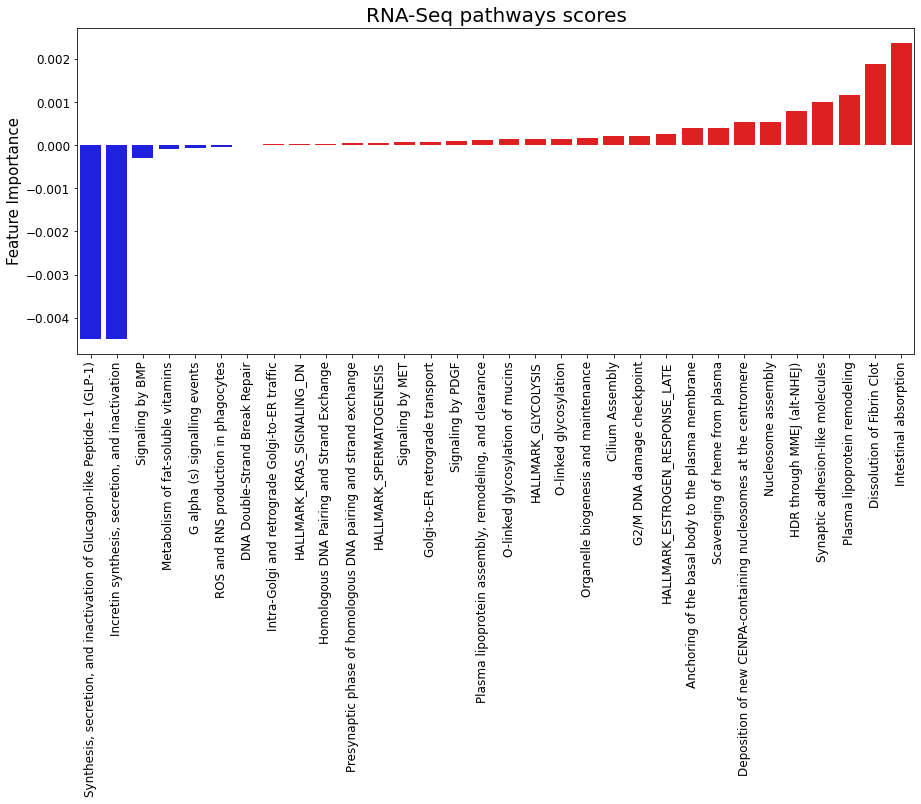

In [13]:
m29, t9 = model_training(rna_pathways, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'ENET', 
               fig_dims = (15,6), max_iter = 5000, tol = 0.001)

R2 score:  0.06699349782067354
MSE:  0.02646565032584282
RPD:  1.0419805289650848
12 features, reduction of 0.00%


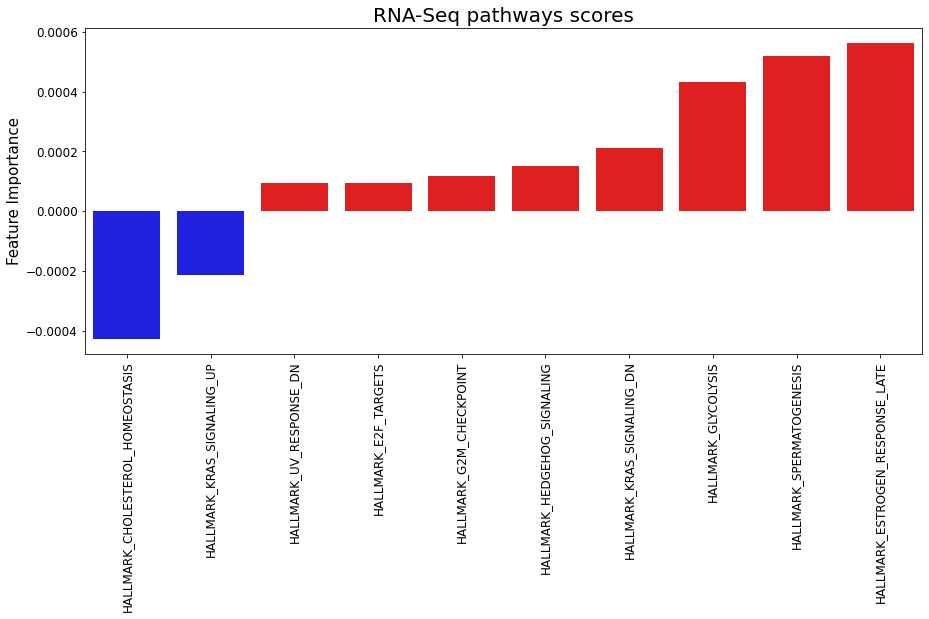

In [14]:
m10, t10 = model_training(rna_pathways_hm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'ENET', 
               fig_dims = (15,6), max_iter = 5000, tol = 0.001)

/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025053787049900203, tolerance: 0.0020634787000000008
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002783916033529163, tolerance: 0.0020634787000000008
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028643770363577514, tolerance: 0.0020634787000000008
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective d

R2 score:  0.10911721428317733
MSE:  0.025270769531638773
RPD:  1.0663300671760432
32 features, reduction of 0.00%


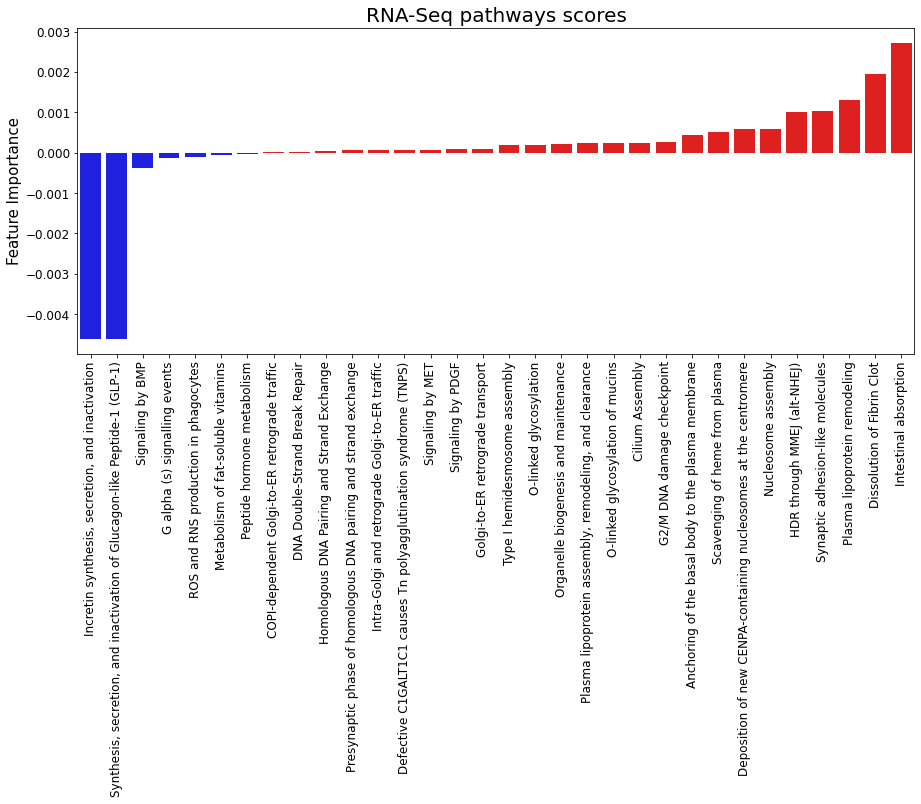

In [15]:
m11, t11 = model_training(rna_pathways_rtm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'ENET', 
               fig_dims = (15,6), max_iter = 5000, tol = 0.001)

/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings

R2 score:  0.07806794604989742
MSE:  0.026151512671173018
RPD:  1.04822009544574
320 features, reduction of 0.00%


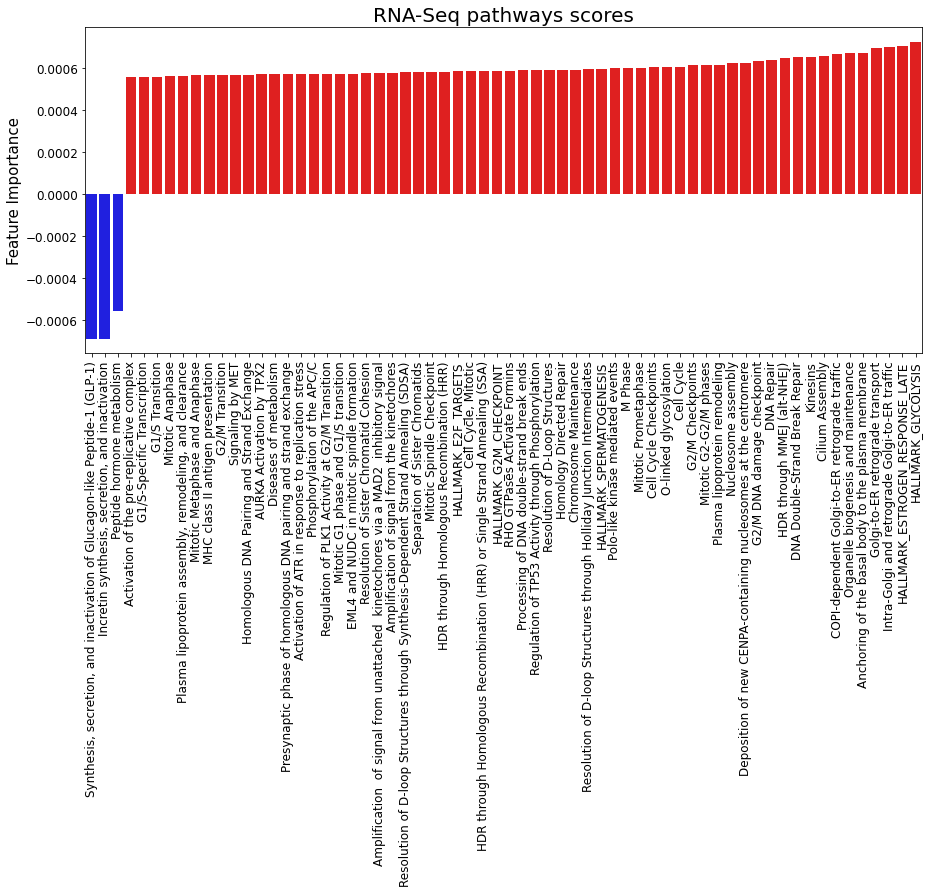

In [16]:
m12, t12 = model_training(rna_pathways, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'PLSR', 
               fig_dims = (15,6), max_iter = 2000, tol = 0.001)

R2 score:  0.06659529277906684
MSE:  0.02647694580488239
RPD:  1.0417582426624956
36 features, reduction of 0.00%


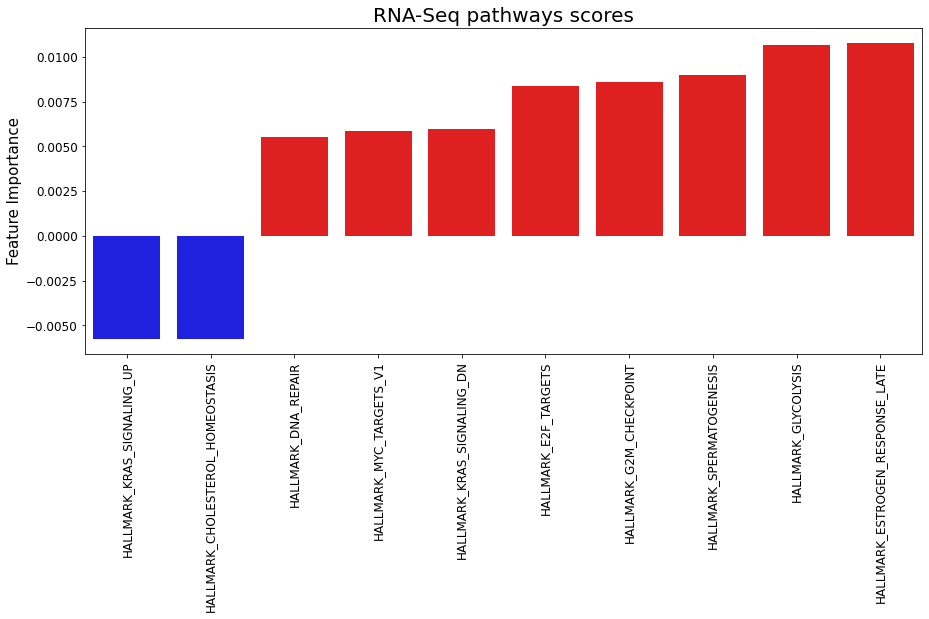

In [17]:
m13, t13 = model_training(rna_pathways_hm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'PLSR', 
               fig_dims = (15,6), max_iter = 2000, tol = 0.001)

/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 70
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 71
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 71
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 71
  warnings

R2 score:  0.07922572552356721
MSE:  0.026118671113656528
RPD:  1.0488789031941705
284 features, reduction of 0.00%


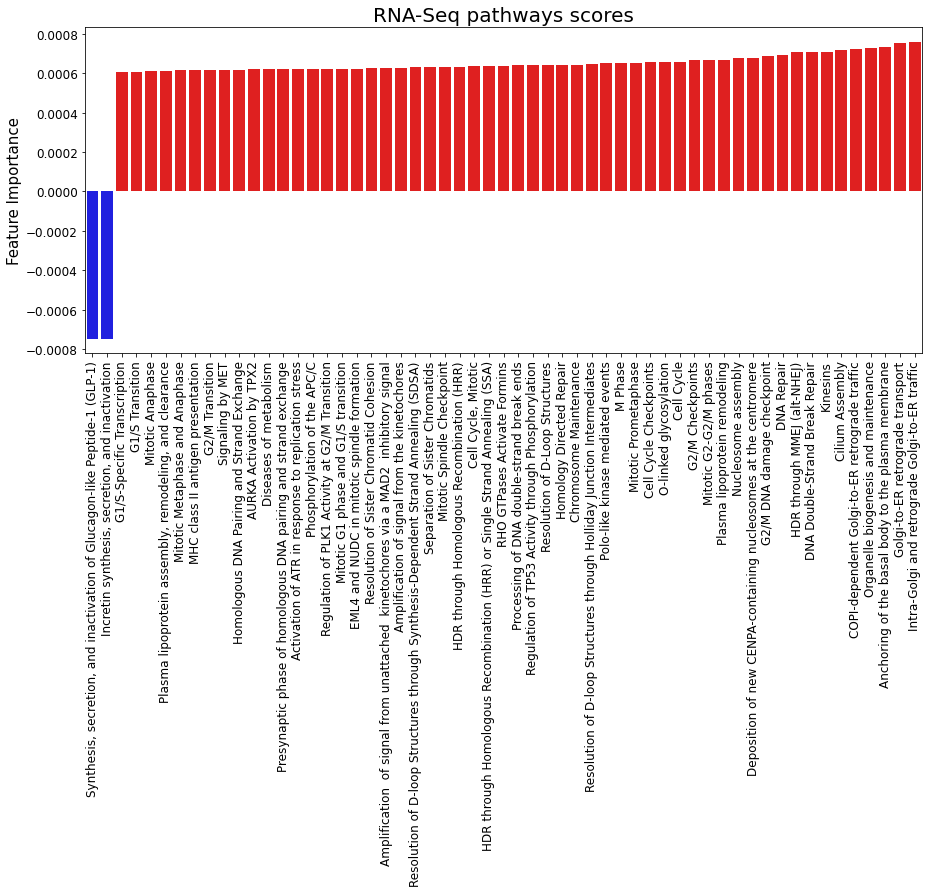

In [18]:
m14, t14 = model_training(rna_pathways_rtm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'PLSR', 
               fig_dims = (15,6), max_iter = 2000, tol = 0.001)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R2 score:  -0.009056116670278502
MSE:  0.028622872702998174
RPD:  1.0019459152835004
133 features, reduction of 0.00%


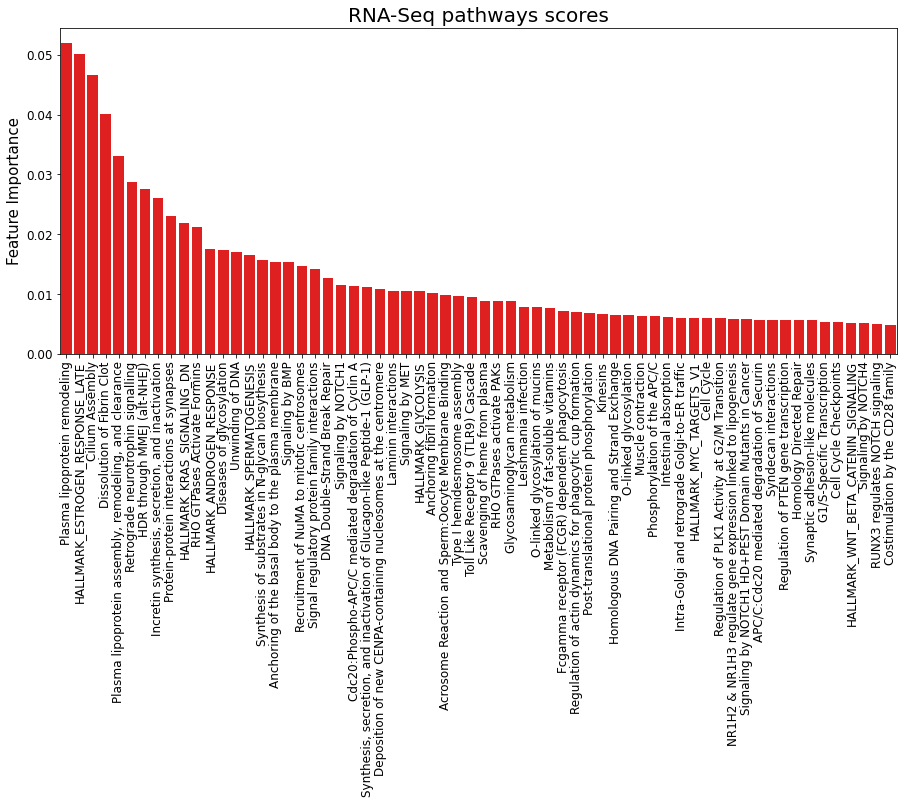

In [19]:
m15, t15 = model_training(rna_pathways, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'RFR', 
               fig_dims = (15,6))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R2 score:  -0.01886136038727715
MSE:  0.028901008118954657
RPD:  0.9971130325421957
36 features, reduction of 0.00%


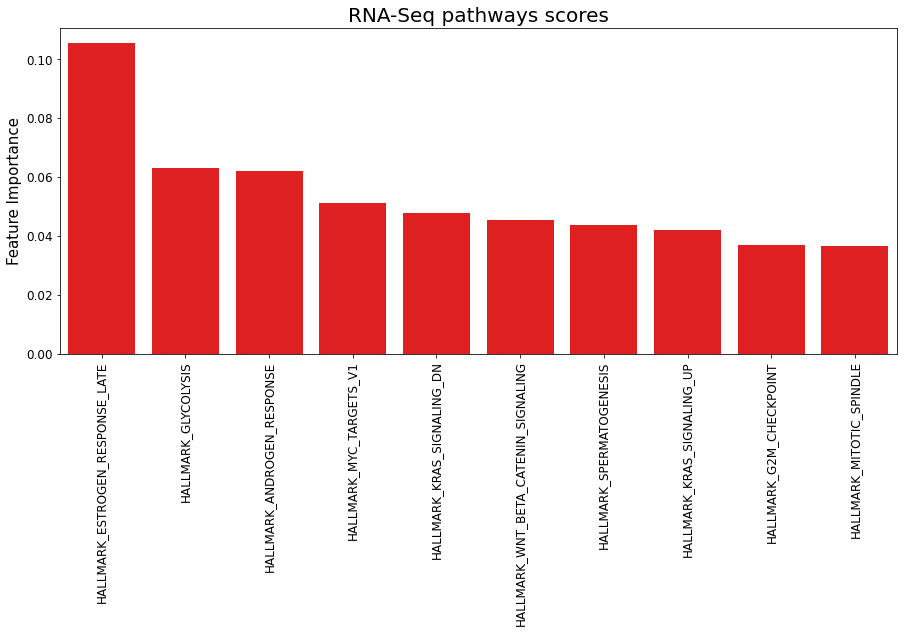

In [20]:
m16, t16 = model_training(rna_pathways_hm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'RFR', 
               fig_dims = (15,6))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R2 score:  0.0033097953018622617
MSE:  0.028272101404566288
RPD:  1.0081423146106976
132 features, reduction of 0.00%


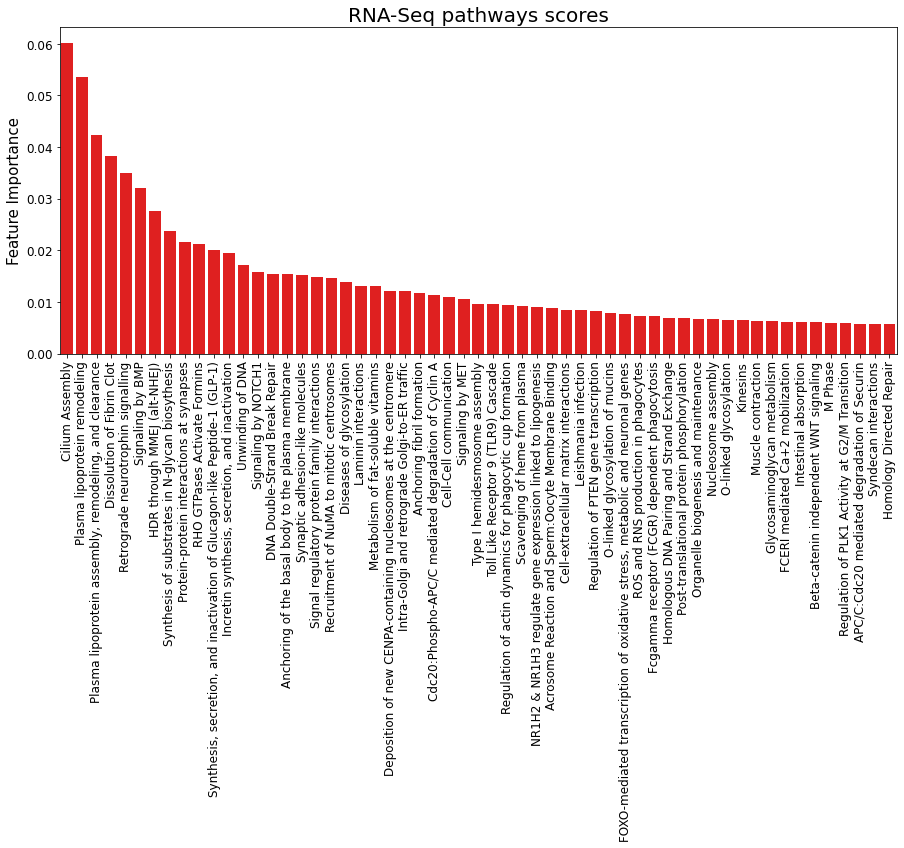

In [21]:
m17, t17 = model_training(rna_pathways_rtm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'RFR', 
               fig_dims = (15,6))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
R2 score:  -0.03524001918190778
MSE:  0.029365604941648256
RPD:  0.9891938615791819
90 features, reduction of 0.00%


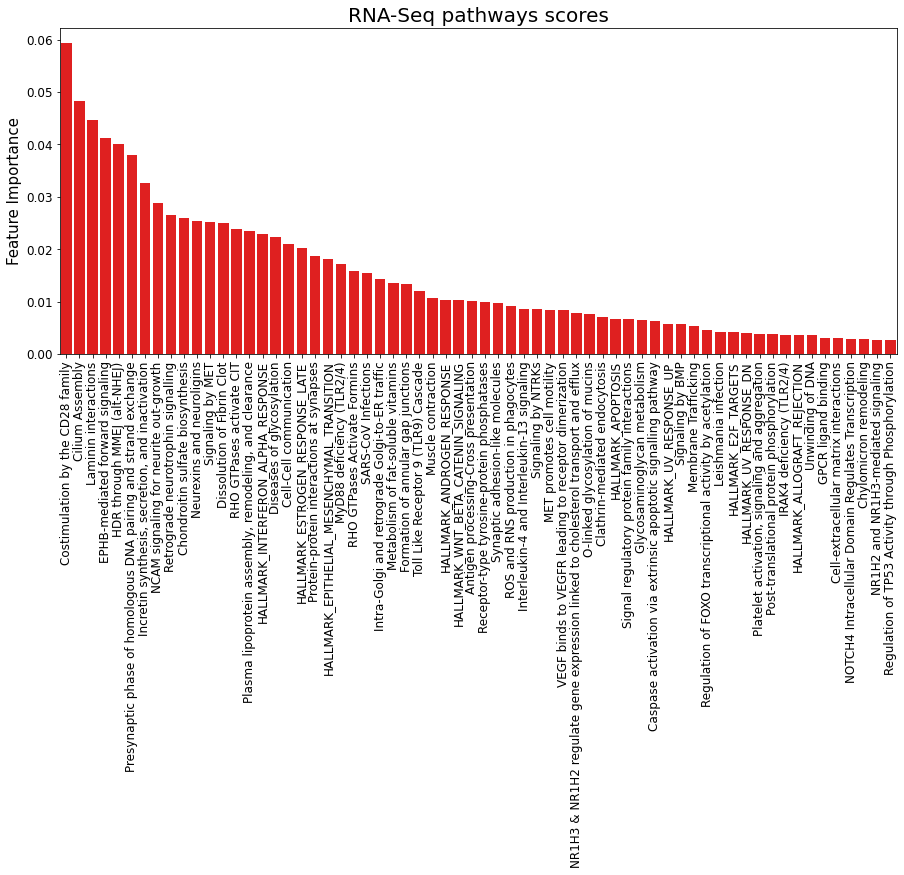

In [22]:
m18, t18 = model_training(rna_pathways, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'XGBR', 
               fig_dims = (15,6))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
R2 score:  -0.12424341823234153
MSE:  0.03189027420341455
RPD:  0.9492306698064474
27 features, reduction of 0.00%


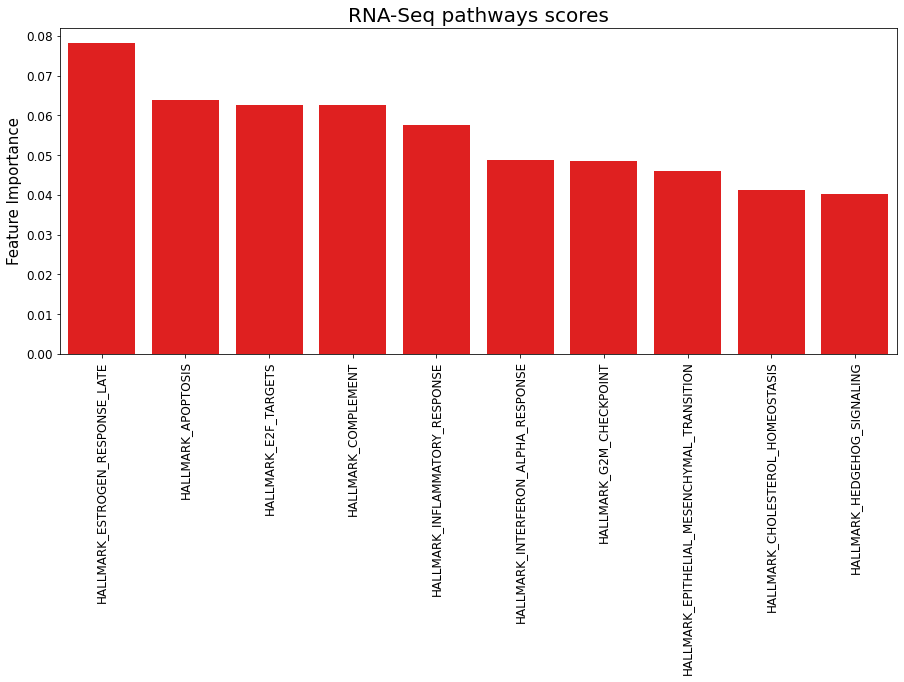

In [23]:
m19, t19 = model_training(rna_pathways_hm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'XGBR', 
               fig_dims = (15,6))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
R2 score:  0.04115642373942374
MSE:  0.02719854443374029
RPD:  1.027846016864101
44 features, reduction of 0.00%


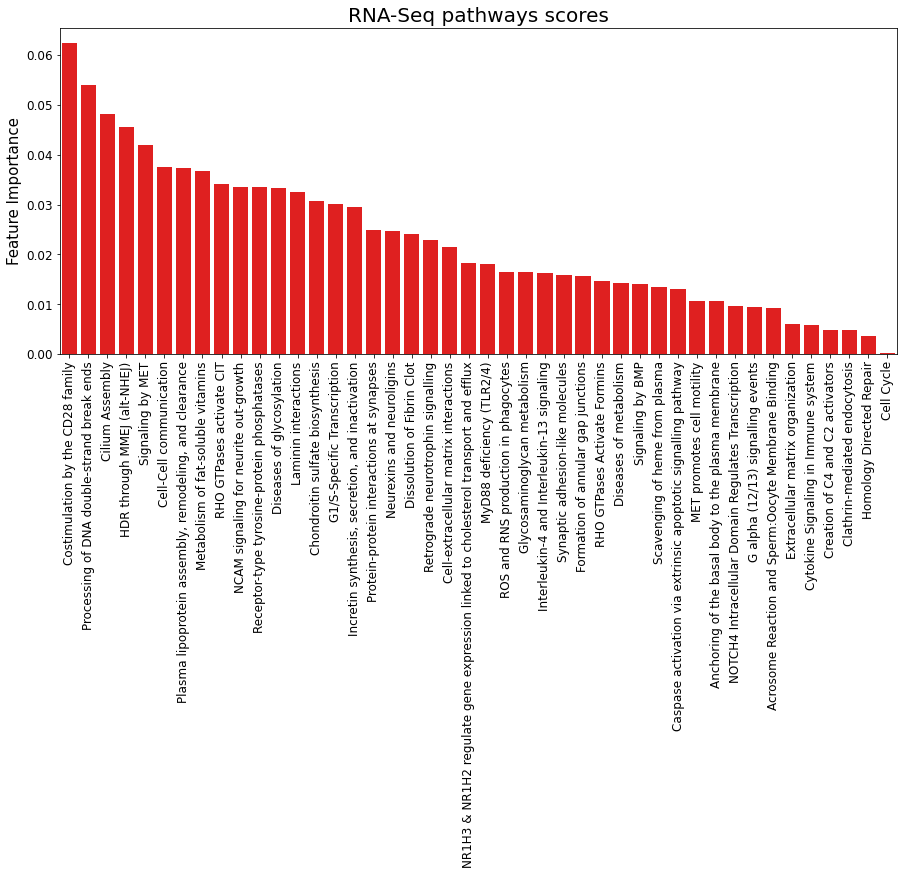

In [24]:
m20, t20 = model_training(rna_pathways_rtm, cde_sila, plt_title = 'RNA-Seq pathways scores', alg = 'XGBR', 
               fig_dims = (15,6))

## Radiomics: HealthMyne

/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002976595927468295, tolerance: 0.0026193264512195122
  positive)
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004142873619361442, tolerance: 0.0026193264512195122
  positive)


R2 score:  0.8436326562629125
MSE:  0.005142454287446755
RPD:  2.5428831971160006
21 features, reduction of 0.00%


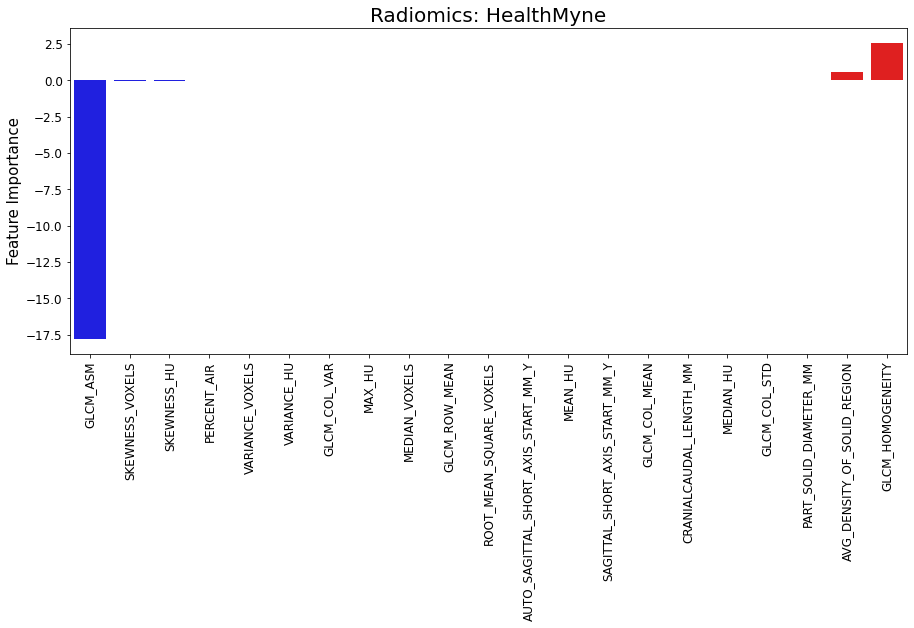

In [25]:
m21, t21 = model_training(rad_hm, cde_sila, plt_title = 'Radiomics: HealthMyne', alg = 'ENET', 
               fig_dims = (15,6), max_iter = 5000, tol = 0.001)

/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 81
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 81
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 82
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 82
  warnings.warn(f"Y residual is constant at iteration {k}")
/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:271: UserWarning: Y residual is constant at iteration 82
  warnings

R2 score:  0.7711405610585294
MSE:  0.007526502496493361
RPD:  2.1019144071556872
295 features, reduction of 0.00%


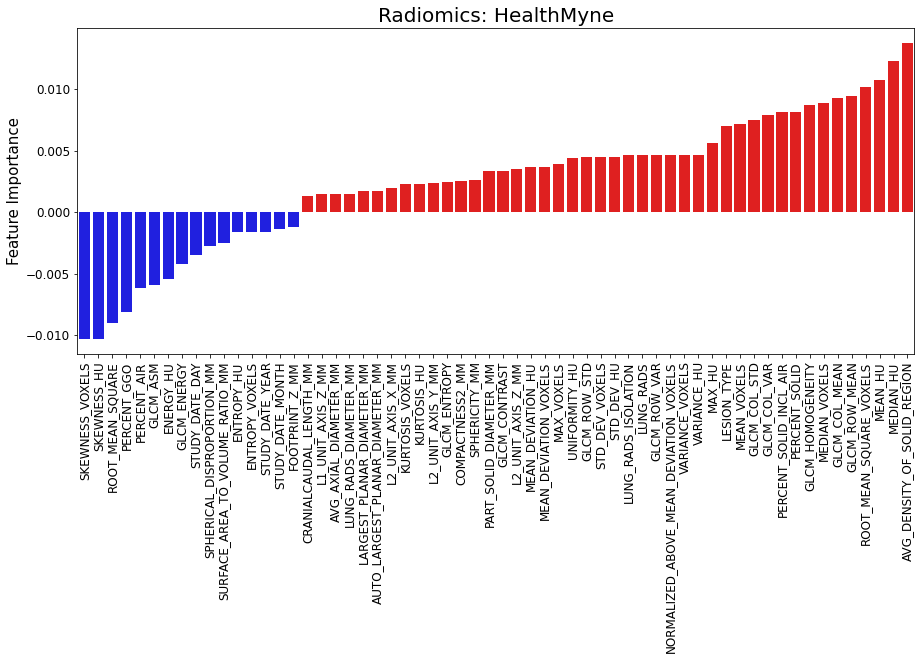

In [26]:
m22, t22 = model_training(rad_hm, cde_sila, plt_title = 'Radiomics: HealthMyne', alg = 'PLSR', 
               fig_dims = (15,6), max_iter = 500, tol = 0.001)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R2 score:  0.7481626690414185
MSE:  0.008282176644917575
RPD:  2.003730862551443
293 features, reduction of 0.00%


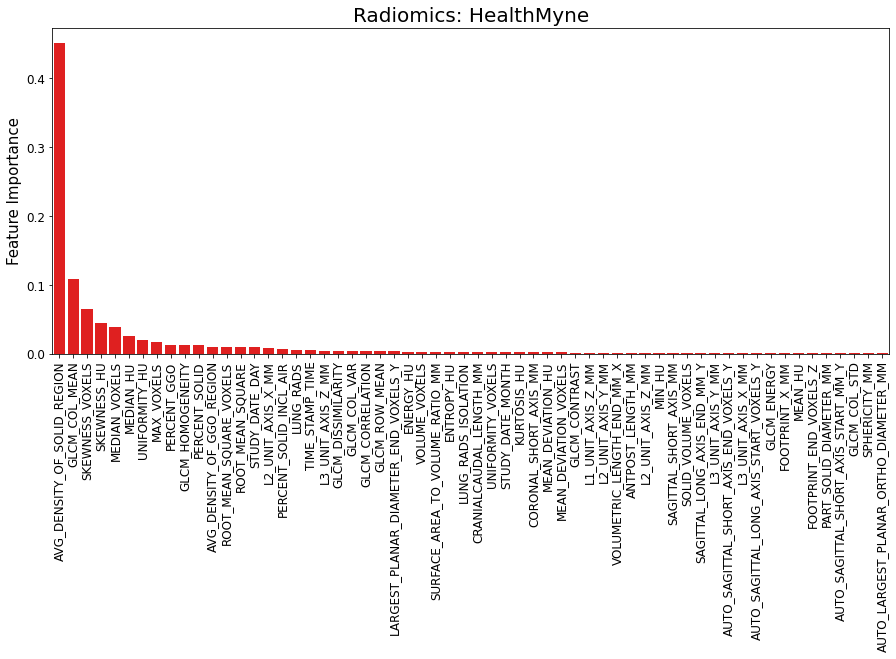

In [27]:
m23, t23 = model_training(rad_hm, cde_sila, plt_title = 'Radiomics: HealthMyne', alg = 'RFR', 
               fig_dims = (15,6))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
R2 score:  0.7221267110177948
MSE:  0.009138421438533082
RPD:  1.9075504846196198
43 features, reduction of 0.00%


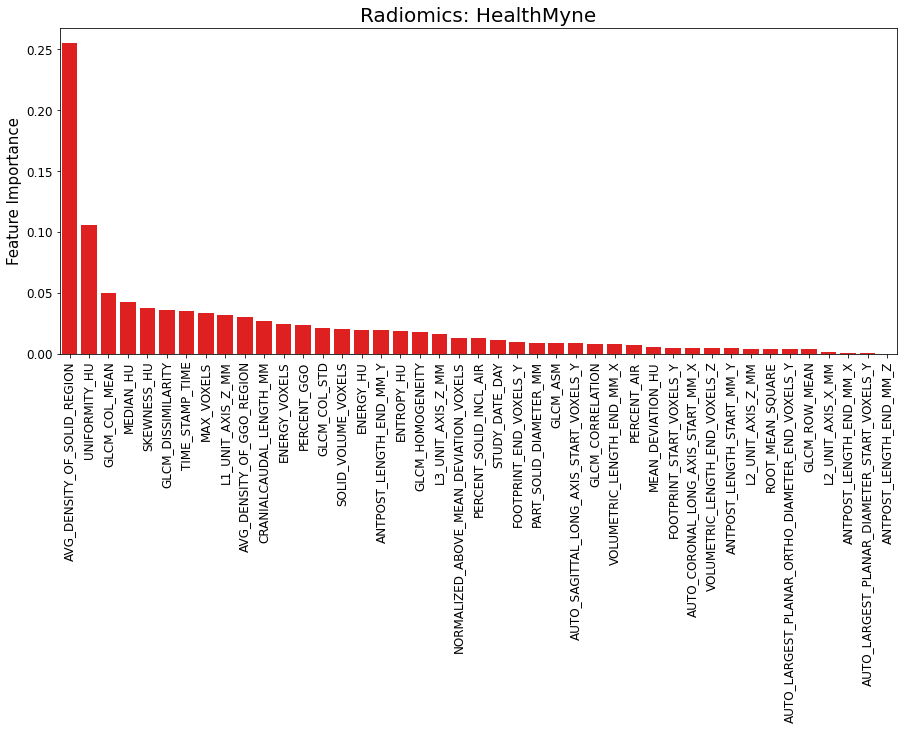

In [28]:
m24, t24 = model_training(rad_hm, cde_sila, plt_title = 'Radiomics: HealthMyne', alg = 'XGBR', 
               fig_dims = (15,6))